In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [3]:
data_path = "jigsaw-toxic-comment-classification-challenge/data/train.csv"
data_raw = pd.read_csv(data_path)
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

('Number of rows in data =', 159571)
('Number of columns in data =', 8)


**Sample data:**


id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

### Checking for missing values

In [4]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


### Calculating number of comments under each label

In [5]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

('Total number of comments = ', 159571)
('Number of clean comments = ', 143346)
('Number of comments with labels =', 16225)


In [6]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [7]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

category  number of comments
0          toxic               15294
1   severe_toxic                1595
2        obscene                8449
3         threat                 478
4         insult                7877
5  identity_hate                1405

/home/waki/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


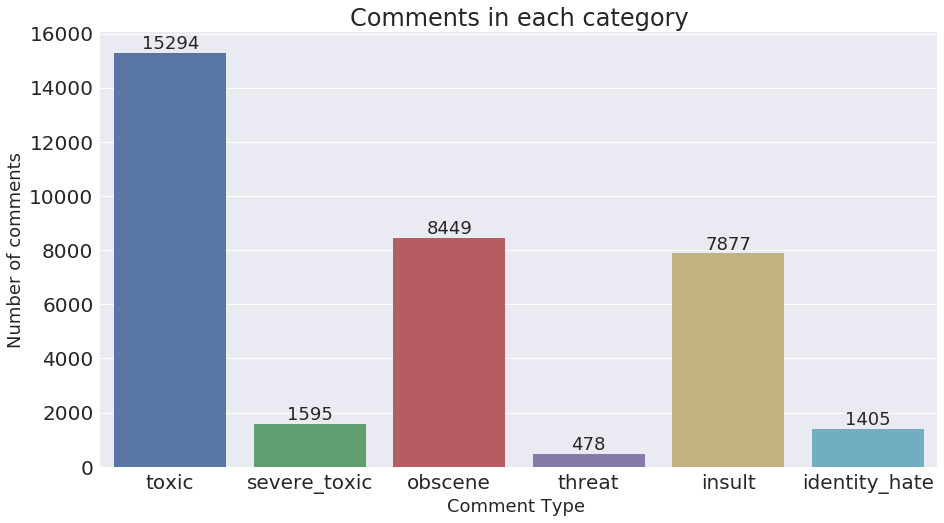

In [8]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

### Calculating number of comments having multiple labels

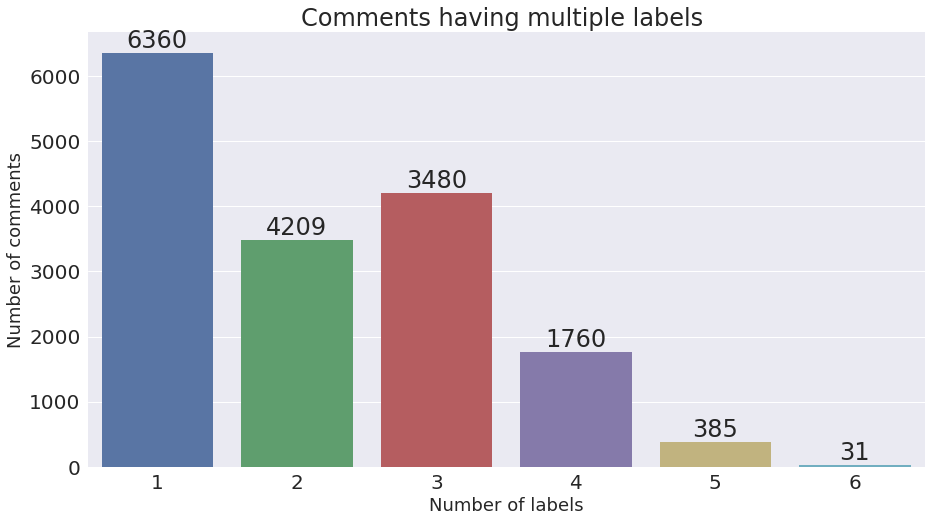

In [9]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### 1.4. WordCloud representation of most used words in each category of comments¶

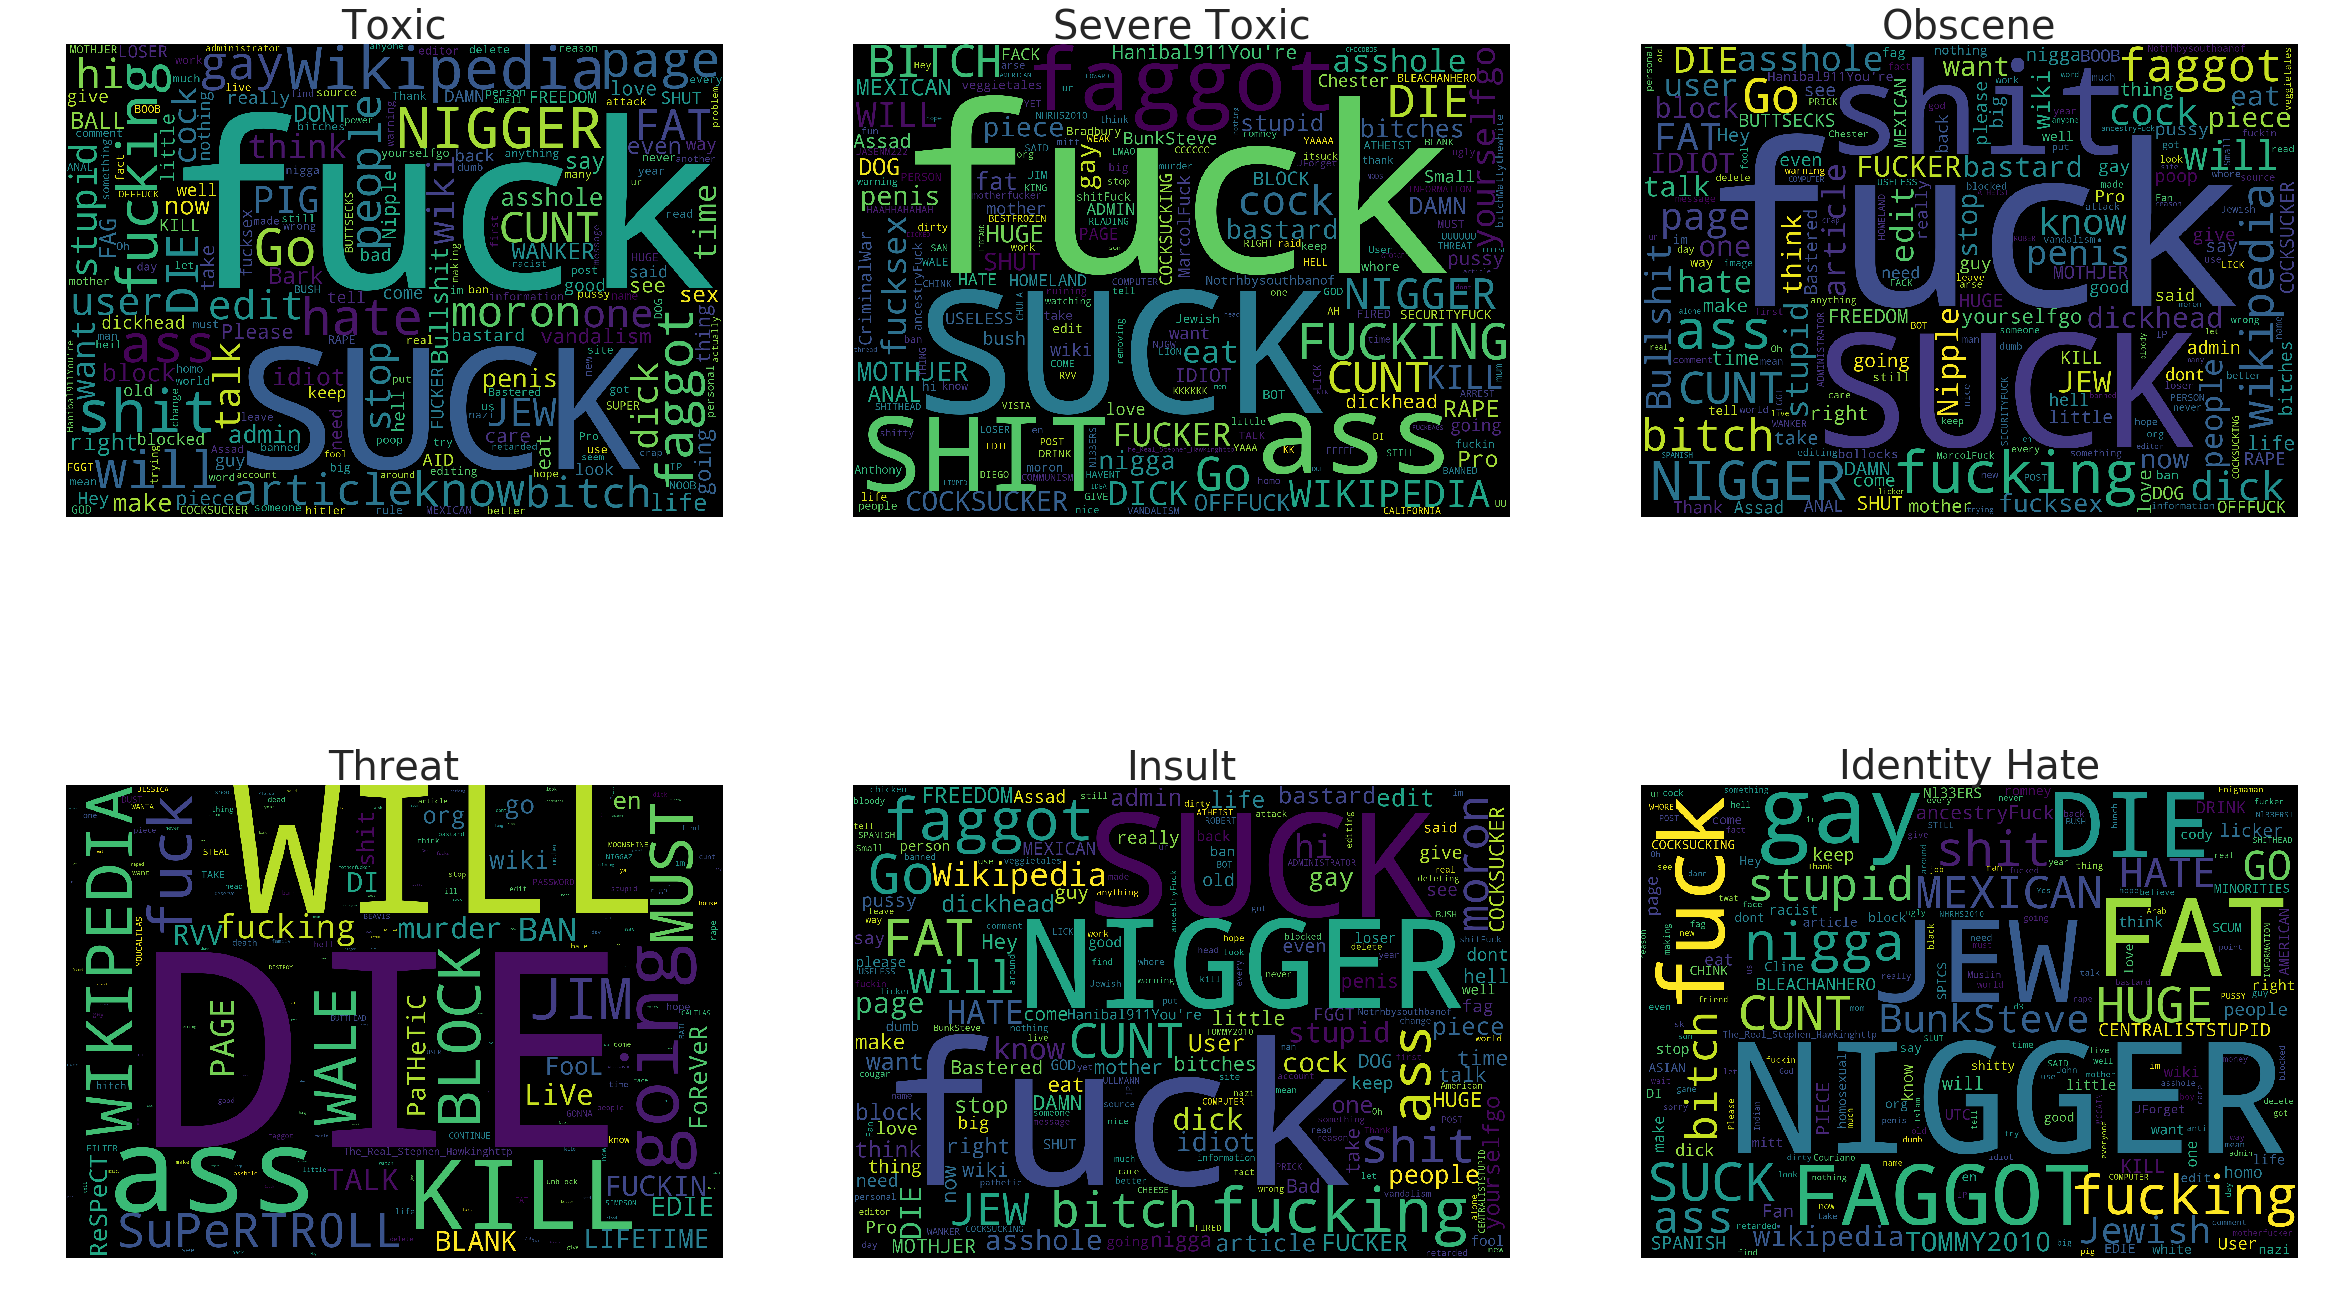

In [11]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)


# obscene
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()

# Data pre-Processing

In [10]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 8)

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Cleaning Data

In [12]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [13]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

id                                       comment_text  \
113890  6127dfdead300881  stanley cup playoffs you are consistently beat...   
110454  4ef0bb27d795ee82                                   dude your a dick   
141674  f600ea06fef4b45b             its complicated i am swiss and british   
155175  ba14f81a03d96bb0  missing info i feel that this article could do...   
72355   c1abbf85e40be10f      oppose per many of the arguments above   talk   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
113890      0             0        0       0       0              0  
110454      1             1        1       0       1              0  
141674      0             0        0       0       0              0  
155175      0             0        0       0       0              0  
72355       0             0        0       0       0              0

In [14]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

id                                       comment_text  \
113890  6127dfdead300881  stanley cup playoffs   consistently beating   ...   
110454  4ef0bb27d795ee82                                        dude   dick   
141674  f600ea06fef4b45b                       complicated   swiss  british   
155175  ba14f81a03d96bb0  missing info  feel   article could    bit     ...   
72355   c1abbf85e40be10f                oppose per many   arguments    talk   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
113890      0             0        0       0       0              0  
110454      1             1        1       0       1              0  
141674      0             0        0       0       0              0  
155175      0             0        0       0       0              0  
72355       0             0        0       0       0              0

### Stemming

In [15]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

id                                       comment_text  \
113890  6127dfdead300881  stanley cup playoff consist beat punch edit pa...   
110454  4ef0bb27d795ee82                                          dude dick   
141674  f600ea06fef4b45b                              complic swiss british   
155175  ba14f81a03d96bb0  miss info feel articl could bit might go appli...   
72355   c1abbf85e40be10f                       oppos per mani argument talk   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
113890      0             0        0       0       0              0  
110454      1             1        1       0       1              0  
141674      0             0        0       0       0              0  
155175      0             0        0       0       0              0  
72355       0             0        0       0       0              0

### Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 8)
(600, 8)


In [17]:
train_text = train['comment_text']
test_text = test['comment_text']

### TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [19]:
train_text

18146     check book titl south right jame ronald kenned...
152654    teen alway get bore shakespear theyll get bore...
126508    cat fun wish world giant cat muuuuuuuuuuuuuuuu...
72065     pleas stop continu vandal page african slave t...
50059            alright fine acknowledg someth wrong again
70593     happi yuletid happi yuletid merri yuletid happ...
58604     barrack rolld page protect want add segment ca...
89474     june utc mop oper see wikipedia talk articl cr...
108396    birth year vs articl current list birth year c...
97541     would unmanag mess plot summari wors rememb co...
93058     declin speedi ive declin speedi sinc magazin m...
134524    pleas vandal page edit oakdal high school cali...
98657     accur machida return nativ brazil face phil da...
119089    imag fsx jpg list delet imag media file upload...
128697                        yeah let anyth els wrong inix
45322     sorri couldnt quit rememb precis said said car...
100787    never said word primit natur o

In [20]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)

In [25]:
__name__ =='__main__'

True

In [23]:
vectorizer.get_feature_names()

[u'aa',
 u'aa arab',
 u'aa arab status',
 u'aa com',
 u'aa com tr',
 u'aaa',
 u'aaa dea',
 u'aaa dea base',
 u'abbrevi',
 u'abbrevi relat',
 u'abbrevi relat west',
 u'abdullah',
 u'abdullah abdullah',
 u'abdullah abdullah yunus',
 u'abdullah yunus',
 u'abdullah yunus qanuni',
 u'abhira',
 u'abhira ahir',
 u'abhira ahir frequent',
 u'abhira etc',
 u'abhira etc materi',
 u'abid',
 u'abid week',
 u'abid week block',
 u'abil',
 u'abil detect',
 u'abil detect remov',
 u'abil engag',
 u'abil engag inspir',
 u'abil occasion',
 u'abil occasion use',
 u'abil set',
 u'abil set achiev',
 u'abl',
 u'abl accept',
 u'abl accept proudhon',
 u'abl challeng',
 u'abl challeng block',
 u'abl chat',
 u'abl chat without',
 u'abl confirm',
 u'abl confirm show',
 u'abl examin',
 u'abl examin realiti',
 u'abl give',
 u'abl give overview',
 u'abl identifi',
 u'abl identifi sourc',
 u'abl make',
 u'abl make it',
 u'abl sinc',
 u'abl sinc began',
 u'abolish',
 u'abolish male',
 u'abolish male privileg',
 u'aboli

In [21]:
y_train

toxic  severe_toxic  obscene  threat  insult  identity_hate
18146       0             0        0       0       0              0
152654      1             0        0       0       0              0
126508      0             0        0       0       0              0
72065       0             0        0       0       0              0
50059       0             0        0       0       0              0
70593       0             0        0       0       0              0
58604       0             0        0       0       0              0
89474       0             0        0       0       0              0
108396      0             0        0       0       0              0
97541       0             0        0       0       0              0
93058       0             0        0       0       0              0
134524      0             0        0       0       0              0
98657       0             0        0       0       0              0
119089      0             0        0       0       0              0
128697      0             0        0       0       0              0
45322       0             0        0       0       0              0
100787      0             0        0       0       0              0
49896       0             0        0       0       0              0
72930       0             0        0       0       0              0
83245       1             0        0       0       0              0
61287       0             0        0       0       0              0
156638      0             0        0       0       0              0
62632       0             0        0       0       0              0
150564      0             0        0       0       0              0
111736      0             0        0       0       0              0
32160       1             0        1       0       0              0
150552      0             0        0       0       0              0
151245      0             0        0       0       0              0
3911        0             0        0       0       0              0
115343      0             0        0       0       1              0
...       ...           ...      ...     ...     ...            ...
25825       1             0        1       0       1              1
86247       0             0        0       0       0              0
73082       1             0        0       0       0              0
43048       0             0        0       0       0              0
35220       0             0        0       0       0              0
37995       0             0        0       0       0              0
133372      0             0        0       0       0              0
94230       0             0        0       0       0              0
24710       0             0        0       0       0              0
35376       0             0        0       0       0              0
67620       0             0        0       0       0              0
154230      0             0        0       0       0              0
105675      0             0        0       0       0              0
30263       0             0        0       0       0              0
124127      0             0        0       0       0              0
57694       0             0        0       0       1              0
15893       0             0        0       0       0              0
98584       0             0        0       0       0              0
19788       0             0        0       0       0              0
77948       0             0        0       0       0              0
81980       0             0        0       0       0              0
109877      0             0        0       0       0              0
157805      0             0        0       0       0              0
1998        0             0        0       0       0              0
94956       1             0        1       0       1              1
30526       0             0        0       0       0              0
144548      0             0        0       0       0            

In [22]:
x_train

<1400x41672 sparse matrix of type '<type 'numpy.float64'>'
	with 37368 stored elements in Compressed Sparse Row format>

# Multi-Label Classification

### 1 - Multiple Binary Classifications - (One Vs Rest Classifier)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [35]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing toxic comments...**

Test accuracy is 0.898333333333




**Processing severe_toxic comments...**

Test accuracy is 0.995




**Processing obscene comments...**

Test accuracy is 0.951666666667




**Processing threat comments...**

Test accuracy is 1.0




**Processing insult comments...**

Test accuracy is 0.945




**Processing identity_hate comments...**

Test accuracy is 0.99


CPU times: user 563 ms, sys: 311 ms, total: 874 ms
Wall time: 1.54 s


### Multiple Binary Classifications - (Binary Relevance)

In [36]:
%%time

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

ImportError: No module named skmultilearn.problem_transform